In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Importing library And Loading Dataset:**

we import Pandas for data manipulation and analysis , Numpy for for numerical computations ,Matplotlib for creating visualizations like plots,seaborn for creating statistical graphics .Than load data set and read CSV file into pandas DataFrame named Data. dataset shapes indicate total size of the Data .Data info shows data features, null count, Datatype . Data head shows few tupple of data set.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/drive/MyDrive/Machine_Learning_Lab/Project/Rana(01)_Topu(34)/retail_store_inventory.csv'
data = pd.read_csv(file_path)


print("Dataset Shape:", data.shape)
print(data.info())
data.head()


Dataset Shape: (73100, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), o

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


**Exploratory Data Analysis (EDA)**:
Handle Missing Values:
Calculate the number of missing values in each column.

Visualize Data:
Plot a histogram of the 'Demand Forecast' column to understand its distribution.
Create a correlation heatmap to visualize relationships between numeric features.

Missing Values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


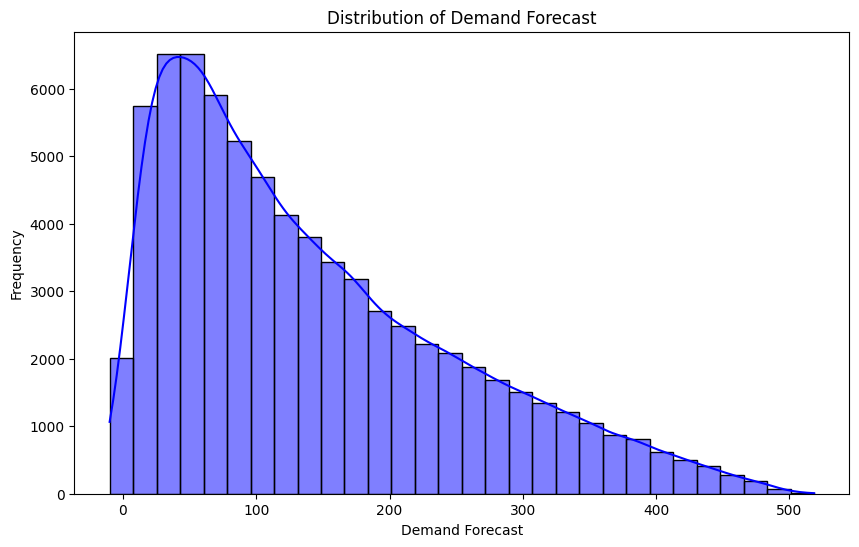

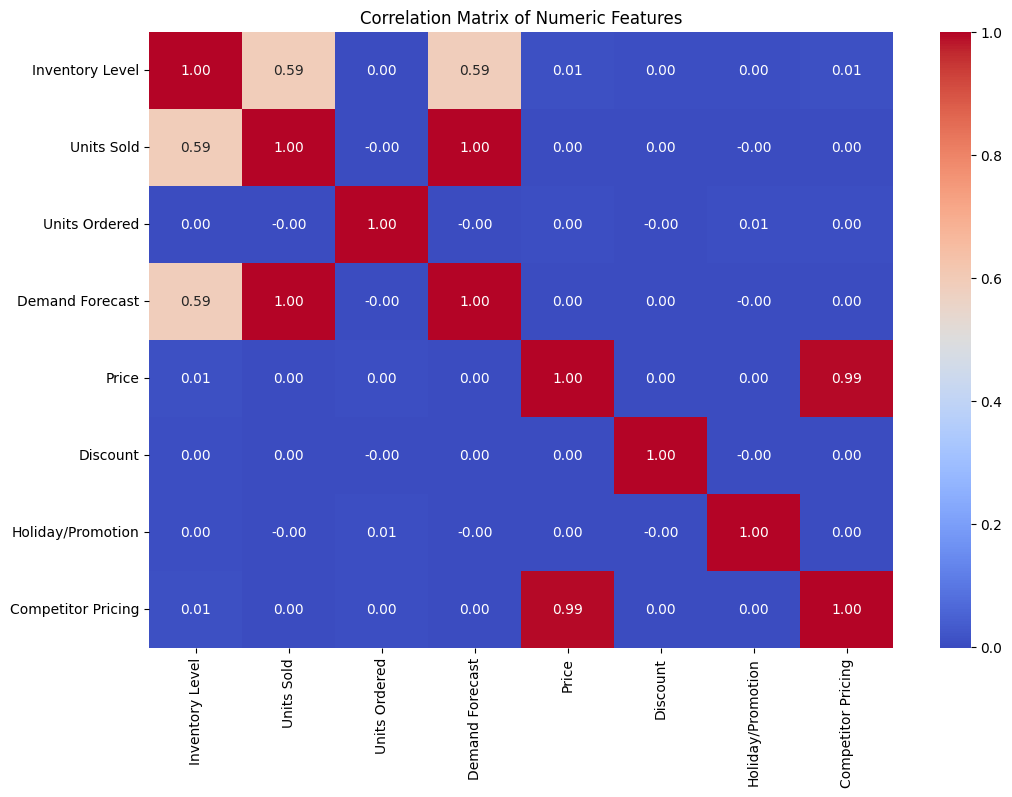

In [ ]:

print("Missing Values:")
print(data.isnull().sum())


plt.figure(figsize=(10, 6))
sns.histplot(data['Demand Forecast'], kde=True, bins=30, color='blue')
plt.title('Distribution of Demand Forecast')
plt.xlabel('Demand Forecast')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


**Feature Engineering [Data Enoding]:**

Extract Date Features: Extract year, month, day, and weekday from the 'Date' column.

Encode Categorical Features: Convert categorical variables (like 'Store ID', 'Product ID', etc.) into numerical format using one-hot encoding.

In [ ]:

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday
data = data.drop(columns=['Date'])


categorical_columns = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


print("Transformed Dataset Shape:", data_encoded.shape)
data_encoded.head()


Transformed Dataset Shape: (73100, 48)


,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Year,Month,...,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,231,127,55,135.47,33.50,20,0,29.69,2022,1,...,False,True,False,False,True,False,False,False,False,False
1,204,150,66,144.04,63.01,20,0,66.16,2022,1,...,True,False,True,False,False,False,True,False,False,False
2,102,65,51,74.02,27.99,10,1,31.32,2022,1,...,True,False,False,True,False,False,True,False,True,False
3,469,61,164,62.18,32.72,10,1,34.74,2022,1,...,True,True,False,False,False,False,False,False,False,False
4,166,14,135,9.26,73.64,0,0,68.95,2022,1,...,False,False,False,False,False,False,True,False,True,False


** Outlier Removal :**

Removing Outleirs using IQR methods

In [ ]:

def remove_outliers_iqr(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


numeric_columns = data_encoded.select_dtypes(include=['float64', 'int64']).columns
data_cleaned = remove_outliers_iqr(data_encoded, numeric_columns)


print("Dataset shape after outlier removal:", data_cleaned.shape)


Dataset shape after outlier removal: (72144, 48)


**Train-Test Split and Scaling:**

Split Data: Divide the dataset into training and testing sets (80% training, 20% testing) using train_test_split.

Scale Features: Standardize the numerical features using StandardScaler to improve model performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data_cleaned.drop(columns=['Demand Forecast'])
y = data_cleaned['Demand Forecast']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


** Model Training and Evaluation**

We select Random forest regression Model with n_estimators=100 and random_state=42 .

Fits the model to the scaled training data (X_train_scaled, y_train).

Predicts demand on the scaled testing data (X_test_scaled) using the trained model (model.predict)

Calculates the Mean Squared Error (MSE) between actual and predicted demand using mean_squared_error.

Calculates the R-squared (R²) score using r2_score to measure the proportion of variance explained by the model

Creates a scatter plot comparing actual vs. predicted demand




Mean Squared Error (MSE): 78.84637760844689
R-Squared: 0.9927727752169702


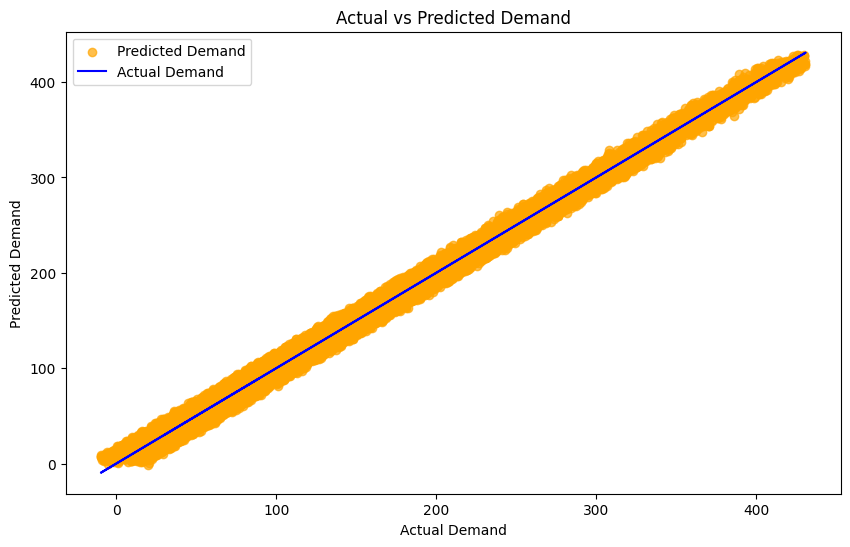

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='orange', label='Predicted Demand')
plt.plot(y_test, y_test, color='blue', label='Actual Demand')  # Diagonal line
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.legend()
plt.show()


Saving the Model:

importing Joblib librery for save the model .

Uses joblib.dump to save the trained Random Forest Regressor model to a file named Inventory_demand.pkl. This allows for future use without retraining the model.

saves the StandardScaler object to a file named scaler.pkl. This is important for ensuring consistent data scaling when making predictions on new data.


In [ ]:


import joblib


joblib.dump(model, 'Inventory_demand.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Loading the Saved Model

In [ ]:

loaded_model = joblib.load('/content/Inventory_demand.pkl')
print("Model loaded successfully.")

Model loaded successfully.


Predicting Demand for New Input

In [ ]:
def preprocess_new_input(new_input, scaler, feature_columns):
    """
    Preprocess the new input data (scaling and encoding).
    Args:
        new_input (pd.DataFrame): The new input data.
        scaler (StandardScaler): The fitted scaler used for training.
        feature_columns (list): The list of feature columns.
    Returns:
        np.ndarray: Preprocessed input data ready for prediction.
    """

    categorical_columns = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
    new_input_encoded = pd.get_dummies(new_input, columns=categorical_columns, drop_first=True)


    new_input_encoded = new_input_encoded.reindex(columns=feature_columns, fill_value=0)


    new_input_scaled = scaler.transform(new_input_encoded)
    return new_input_scaled


new_input = pd.DataFrame({
    'Store ID': ['Store_A'],
    'Product ID': ['Prod_1'],
    'Category': ['Toy'],
    'Region': ['Shouth'],
    'Weather Condition': ['snowy'],
    'Seasonality': ['Low'],
    'Year': [2024],
    'Month': [12],
    'Day': [25],
    'Weekday': [0],
})


new_input_preprocessed = preprocess_new_input(new_input, scaler, X.columns)

# Predict demand
predicted_demand = loaded_model.predict(new_input_preprocessed)
print(f"Predicted Demand: {predicted_demand[0]}")


Predicted Demand: 1.3394999999999997
